In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
train=pd.read_csv('/kaggle/input/titanic/train.csv')
test=pd.read_csv('/kaggle/input/titanic/test.csv')
import seaborn as sns
import matplotlib.pyplot as plt

([<matplotlib.axis.XTick at 0x7f7769b57490>,
 <a list of 3 Text major ticklabel objects>)

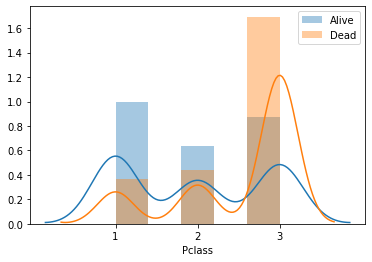

In [3]:
sns.distplot(a=train[train['Survived']==1]['Pclass'],label='Alive',bins=5)
sns.distplot(a=train[train['Survived']==0]['Pclass'],label='Dead',bins=5)
plt.legend()
plt.xticks([1,2,3])

**More People From the Third Class Died as Compared to  the First Class**

In [4]:
test['Age'].replace(np.nan,np.median(test['Age'].dropna()),inplace=True)
train['Age'].replace(np.nan,np.median(train['Age'].dropna()),inplace=True)

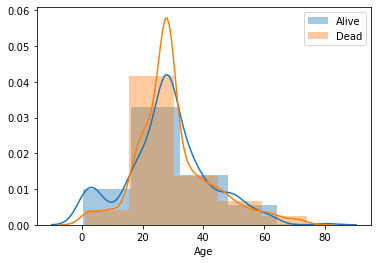

In [5]:
train.head()
sns.distplot(a=train[train['Survived']==1]['Age'],label='Alive',bins=5)
sns.distplot(a=train[train['Survived']==0]['Age'],label='Dead',bins=5)
plt.legend()

In [6]:
train['Sex'].replace({'male':1,'female':0},inplace=True)
test['Sex'].replace({'male':1,'female':0},inplace=True)

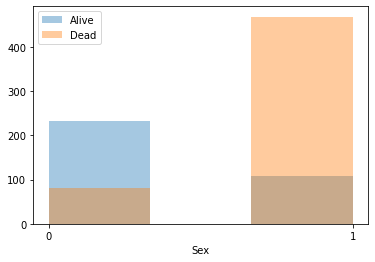

1    577
0    314
Name: Sex, dtype: int64

In [7]:

sns.distplot(a=train[train['Survived']==1]['Sex'],kde=False,bins=3,label='Alive')
sns.distplot(a=train[train['Survived']==0]['Sex'],kde=False,bins=3,label='Dead')
plt.legend()
plt.xticks([0,1])
plt.show()
train['Sex'].value_counts()

**Much more men died as compared to women**

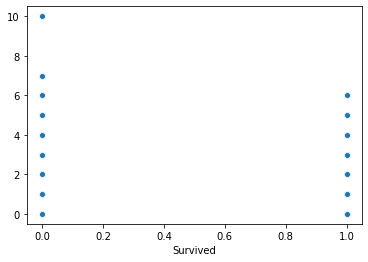

In [8]:
sns.scatterplot(x=train['Survived'],y=train['SibSp']+train['Parch'])

**There is no relation between the number of family members on board and the chance of survival.Hencw we'll drop this column.**

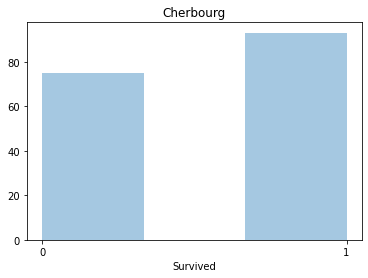

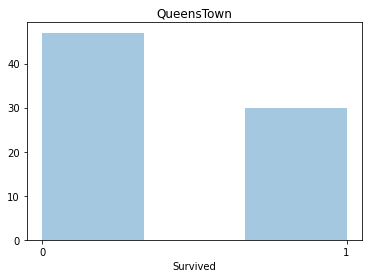

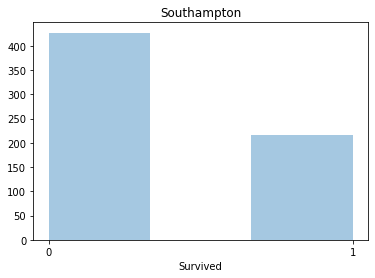

In [9]:
sns.distplot(a=train[train['Embarked']=='C']['Survived'],bins=3,kde=False)
plt.title("Cherbourg")
plt.xticks([0,1])
plt.show()
plt.title("QueensTown")
sns.distplot(a=train[train['Embarked']=='Q']['Survived'],bins=3,kde=False)
plt.xticks([0,1])

plt.show()
plt.title("Southampton")
sns.distplot(a=train[train['Embarked']=='S']['Survived'],bins=3,kde=False)
plt.xticks([0,1])

plt.show()

**Most of the people that died embarked from the Port of Southampton**

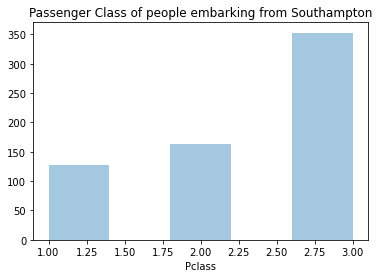

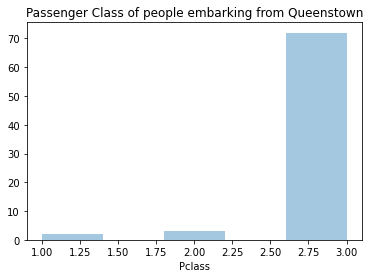

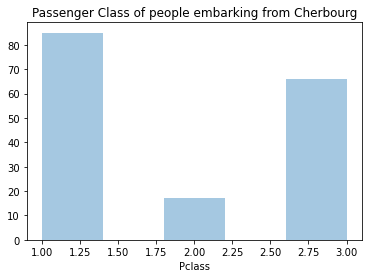

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
sns.distplot(a=train[train['Embarked']=='S']['Pclass'],kde=False,bins=5)
plt.title('Passenger Class of people embarking from Southampton')
plt.show()
sns.distplot(a=train[train['Embarked']=='Q']['Pclass'],kde=False,bins=5)
plt.title('Passenger Class of people embarking from Queenstown')
plt.show()
sns.distplot(a=train[train['Embarked']=='C']['Pclass'],kde=False,bins=5)
plt.title('Passenger Class of people embarking from Cherbourg')
plt.show()
train['Embarked'].value_counts()

**Most of the Passengers embarked from Southampton**

In [11]:
embarked=pd.get_dummies(train['Embarked'])
t_embarked=pd.get_dummies(test['Embarked'])
train=train.join(embarked)
test=test.join(t_embarked)

In [12]:
train.drop(['Name','SibSp','Parch','Ticket','Cabin','Embarked'],inplace=True,axis=1)
test.drop(['Name','SibSp','Parch','Ticket','Cabin','Embarked'],inplace=True,axis=1)

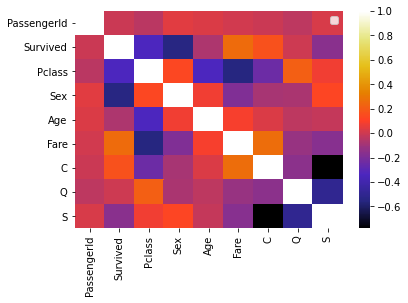

In [13]:
sns.heatmap(train.corr(),cmap='CMRmap')
plt.legend()

**Corelation between the columns in the data**

In [14]:
test['Fare'].replace({np.nan:np.median(test['Fare'].dropna())},inplace=True)

In [15]:
test.set_index('PassengerId',inplace=True)
train.set_index('PassengerId',inplace=True)

In [16]:
from sklearn.ensemble import RandomForestClassifier
X_train=train.drop('Survived',axis=1)
y_train=train['Survived']

In [17]:
forest=RandomForestClassifier(max_depth=4,n_estimators=2000)
forest.fit(X_train,y_train)
y_pred=forest.predict_proba(test)
y_pred=(y_pred[:,1]>0.45).astype(int)
final_df=pd.DataFrame({'PassengerId':test.index,'Survived':y_pred})
final_df.set_index('PassengerId',inplace=True)

**If probability of survival is more than 0.45 then we predict that the person has survived.**

In [18]:
final_df.to_csv('submit.csv')#the one with 0.784 score

In [19]:
from sklearn.svm import SVC
svc=SVC(C=1,gamma=10)
svc.fit(X_train,y_train)
y_pred2=svc.predict(test)
final_df2=pd.DataFrame({'PassengerId':test.index,'Survived':y_pred2})
final_df2.set_index('PassengerId',inplace=True)

In [20]:
final_df2.to_csv('submit.csv')#the one with 0.5 score